In [ ]:
# NLP- natural language processing
# goal is to draw out meaning from a natural language

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#get the helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-12-31 09:08:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-12-31 09:08:55 (75.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

In [ ]:
#get a text dataset
# dataset we are going to use is kaggles introduction to nlp : sample tweets if disaster or not disaster
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-12-31 09:08:59--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-12-31 09:09:00 (125 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
#unzip the data
unzip_data("nlp_getting_started.zip")

In [ ]:
#visualizing the text dataset
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

# target=1 disaster target=0 not disaster


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#shuffle the training data
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
#see the test data
test_df.head()
#there are no labels for the test dataset

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#how many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#total number of samples
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
#visualise random train samples
import random
random_index=random.randint(0,len(train_df)-5)

for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target =row
  print(f"Target : {target} ","(real disaster)" if target>0 else "(not a disaster)")
  print(f"Text:{text}")
  # print(row)

Target : 1  (real disaster)
Text:Severe Thunderstorm Warnings have been cancelled in central Oklahoma. Still expect 50 mph winds penny sized hail
Target : 0  (not a disaster)
Text:@bellalinn alrighty Hit me up and we'll blaze!!
Target : 1  (real disaster)
Text:Thank you to @scegnews! Our neighborhood looks like a war zone but we had power back in 4 hours!
Target : 0  (not a disaster)
Text:Blazing Hot! Etisalat Free MB For Complete 12 Months: Etisalat Is Giving out 100MB on TECNO Q1 here is the Ime... http://t.co/AVzsYIe1nT
Target : 0  (not a disaster)
Text:DON'T MAKE FUN OF THEM FOR TRYING
TO SURVIVE IN SUCH A RACIST ELITIST COUNTRY


In [ ]:
#creating a validation dataset
from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       random_state=42,
                                                                       test_size=0.1 )

In [ ]:
train_sentences.shape

(6851,)

In [ ]:
#check the lengths
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[:10],train_labels[:10]


(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [ ]:
#converting text data into numbers before we create a number
# 1. tokenization : map each word or char to a number
# 2. embeddings : embedings can be learned

In [ ]:


# #use the default text vectorization parameters
# text_vectorizer=TextVectorization(max_tokens=None,#how many words in our sentences (adds <OOV>)
#                                   standardize="lower_and_strip_punctuation",
#                                   split="whitespace",
#                                   ngrams=None,#cretes groups of n words
#                                   output_mode="int",#tokens map to an integer
#                                   output_sequence_length=None,#how long you want your sentences to be
#                                   pad_to_max_tokens=True#pads each sequence to the longest sequence(pads zeroes to the smaller sentences)
#                                   )

In [ ]:
[len(i.split()) for i in train_sentences] # this gives a list of all the lengths of the tweets eg: [6,8,3,19,3 .....]
# => sum(list)

In [ ]:
#find the avg number of tokens in the training tweet
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
#tokenization
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
#setup text vectorization variables
max_vocab_length=1000 #max number of words we have in our vocabulary
max_length=15 #max length our sequence will be (how many words from a tweet our model would see)

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode="int",#tokens map to an integer
                                  output_sequence_length=max_length
                                  )

In [ ]:
#fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

In [ ]:
# create a sample sentence and map it
sample_sentence="Theres a flood in my city!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 182,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
#choose a random sentence in our dataset and tokenize it
random_sentence=random.choice(train_sentences)
print(f"original text: {random_sentence}\n\n")
text_vectorizer([random_sentence])

original text: What it was like to survive the atomic bombing of Hiroshima
http://t.co/LGrOcbXPqo




<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 55,  15,  23,  25,   5, 310,   2, 210, 156,   6, 130,   1,   0,
          0,   0]])>

In [ ]:
#get unique words in our vocabulary
words_in_vocab=text_vectorizer.get_vocabulary()#get all the unique words in our training data
top_5_words=words_in_vocab[:5]#get the most common words
bottom_5_words=words_in_vocab[-5:]#get the least common words
print(f"Number of words in vocab is {len(words_in_vocab)}")
print(f"top 5 common words in our vocab is {top_5_words}")
print(f"least 5 common words are {bottom_5_words}")

Number of words in vocab is 1000
top 5 common words in our vocab is ['', '[UNK]', 'the', 'a', 'in']
least 5 common words are ['reported', 'r', 'pray', 'playlist', 'patience']


In [ ]:
#embedding text : create an embedding layer to convert text into embeddings => turns positive integers into dense vectors of fixed size
# input_dim = size of our vocabulary
# output_dim = size of the output embedding vector,for value of 100 means each token would get represented as a vector of legth 100
# input_length = length of the input layers being passed to the embedding layer


In [ ]:
from tensorflow.keras import layers
embedding= layers.Embedding(input_dim=max_vocab_length,
                            output_dim=128,#neural networks with a gpu works quite well with numbers which are divisible by 8
                            input_length= max_length
                            ) 

In [ ]:
# get a random sentences from training set
random_sentence=random.choice(train_sentences)
print(f"original texts : {random_sentence}\n\n embedded version")

#embedd the random sentence
sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed


original texts : Most of us ddnt get this English  RT @ReIgN_CoCo: The World Is Inundated With Ostentatious People Stay Woke!

 embedded version


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03413769,  0.01363819,  0.0287252 , ..., -0.02668788,
         -0.0021557 ,  0.02733735],
        [-0.00493956, -0.01290101, -0.03148295, ..., -0.02108341,
          0.04159049, -0.01224623],
        [-0.02535622,  0.03495662, -0.02618501, ...,  0.04256514,
         -0.03162748,  0.03944797],
        ...,
        [ 0.00592927,  0.02159103, -0.02522588, ..., -0.02116433,
         -0.03551346,  0.01635737],
        [ 0.01340691, -0.01548291,  0.04283221, ..., -0.01907736,
         -0.01521622,  0.04734167],
        [ 0.02061846, -0.04245063, -0.02317998, ..., -0.02609052,
         -0.02055353,  0.03480401]]], dtype=float32)>

modelling our NLP problem

* Model 0: Naive bayes
* Model 1: feed forward neural network (dense)
* Model 2: LSTM model(RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional LSTM (RNN)
* Model 5: 1D convolutional model
* Model 6: tensorflow hub models (transfer labels)
* Model 7: model 6 with only 10 percent of data

In [ ]:
#model 0 getting a baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create tokenization and modelling pipeline
model_0=Pipeline([
                      ("tfidf",TfidfVectorizer()),# convert words to numbers using tfidf
                      ("clf",MultinomialNB())
  ]
)
#fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# evaluate our baseline model
baseline_score=model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of {baseline_score*100:2f}%")

Our baseline model achieves an accuracy of 79.265092%


In [ ]:
#create a function to evaluate function for our modelling experiments
# for the following matrics accuracy,precision, f1 score,recall

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """ calculates model accuracy, f1score, recall , precision
  """
  #calculate model accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100
  # calculate the model precision,recall and f1 score (using weighted average)

  model_prediction, model_recall, model_f1,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results={"accuracy":model_accuracy,
                 "precision": model_recall,
                 "recall": model_recall,
                 "f1":model_f1}
  return model_results


In [ ]:
#get baseline evaluatuion
baseline_results=calculate_results(y_true=val_labels,
                                   y_pred=baseline_preds)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.7926509186351706,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
#build our first deep learning model for our problem

In [ ]:
#create tensorboard callbacks
from helper_functions import create_tensorboard_callback
#create a directory to save tensorflow logs
SAVE_DIR="model_logs"

In [ ]:
#build a model with the funtional api
import tensorflow as tf
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,), #inputs are one dimensional strings
                    dtype=tf.string)
#convert string into numbers 
x=text_vectorizer(inputs)
# create an embedding of the numberized inputs
x=embedding(x)
x=layers.Dropout(0.2)(x)
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding/ condense the feature vector fro each token to one vector
x=layers.Dropout(0.2)(x)
outputs=layers.Dense(1,activation="sigmoid")(x)

model_1=tf.keras.Model(inputs,outputs)


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 dense_4 (Dense)             (None, 15, 10)            1290      
                                                                 
 dropout_7 (Dropout)         (None, 15, 10)            0         
                                                                 
 global_average_pooling1d_4   (None, 10)               0         
 (GlobalAveragePooling1D)                                  

In [ ]:
#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=10,
                            validation_data=(val_sentences,val_labels),
                            # callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                            #                                        experiment_name="model_1_dense")]
                            )

Epoch 1/10
215/215 [==============================] - 3s 9ms/step - loss: 0.3953 - accuracy: 0.8264 - val_loss: 0.5395 - val_accuracy: 0.7717
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3760 - accuracy: 0.8321 - val_loss: 0.5291 - val_accuracy: 0.7664
Epoch 3/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3688 - accuracy: 0.8349 - val_loss: 0.5479 - val_accuracy: 0.7664
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3697 - accuracy: 0.8335 - val_loss: 0.5438 - val_accuracy: 0.7677
Epoch 5/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3662 - accuracy: 0.8389 - val_loss: 0.5392 - val_accuracy: 0.7638
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3656 - accuracy: 0.8384 - val_loss: 0.5402 - val_accuracy: 0.7651
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3599 - accuracy: 0.8384 - val_loss: 0.5665 - val_accuracy: 0.7664
Epoch 

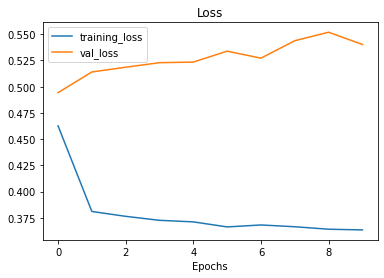

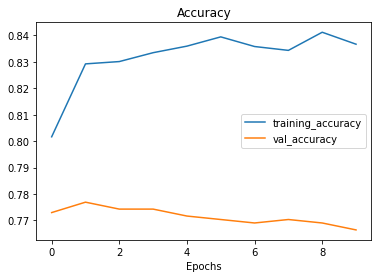

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
#covert prediction probabilities into label format
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
# calculate our model1 results
model_1_results=calculate_results(y_true=val_labels,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 76.9028871391076,
 'precision': 0.7690288713910761,
 'recall': 0.7690288713910761,
 'f1': 0.7671875324347506}

It seems like our baseline model outperforms our dense model

In [ ]:
#visualising our learned embeddings 
#get the words in the vocabulary
words_in_vocab=text_vectorizer.get_vocabulary()
words_in_vocab[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-trainable

In [ ]:
#get the weight matrix of the embedding for 10 epochs
embed_weights=model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.02190056,  0.04197846, -0.04894399, ...,  0.03177404,
        -0.05246093, -0.033416  ],
       [-0.00381705,  0.01820362,  0.0397791 , ...,  0.0192368 ,
        -0.04990295,  0.00196477],
       [-0.04034731, -0.00981648, -0.05263131, ...,  0.02661455,
         0.02098134, -0.05143819],
       ...,
       [-0.05188732, -0.00936916,  0.01029994, ..., -0.02636024,
         0.03263229, -0.03344673],
       [-0.05630291,  0.08563139, -0.05809856, ...,  0.06072908,
        -0.00956332, -0.02641162],
       [ 0.0182539 , -0.0084071 ,  0.0259268 , ..., -0.03106571,
         0.03991099,  0.06407958]], dtype=float32)

In [ ]:
embed_weights.shape

(1000, 128)

In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
#download files to the local machine to upload it on the tensorflow projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Recurrent neural networks

# rnn are useful for sequence  data 



model 2 : LSTM

In [ ]:
#lstm : long short term memory
# structure of rnn looks like : input -> vectorize -> embed >  rnn/dense layers > output

In [ ]:
#create an lstm model
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,),dtype="string")

x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(units=64,return_sequences=True)(x)
x= layers.LSTM(64)(x)
x= layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_lstm")


In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history=model_2.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_rnn")])

Saving TensorBoard log files to: model_logs/model_2_rnn/20221211-125906
Epoch 1/5
215/215 [==============================] - 13s 31ms/step - loss: 0.3972 - accuracy: 0.8262 - val_loss: 0.5021 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.3687 - accuracy: 0.8387 - val_loss: 0.4959 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3639 - accuracy: 0.8393 - val_loss: 0.5323 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3553 - accuracy: 0.8470 - val_loss: 0.5411 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3352 - accuracy: 0.8568 - val_loss: 0.5388 - val_accuracy: 0.7638


In [ ]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.7866203 ],
       [0.6670655 ],
       [0.97026354],
       [0.06743045],
       [0.05719031],
       [0.98580086],
       [0.9143871 ],
       [0.90252763],
       [0.6440559 ],
       [0.1370369 ]], dtype=float32)

In [ ]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_results=calculate_results(y_true=val_labels,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 76.37795275590551,
 'precision': 0.7637795275590551,
 'recall': 0.7637795275590551,
 'f1': 0.7606174738101644}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.7926509186351706,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
#model 3: GRU - gated recurrent unit
#another effective and famous rnn componenet is GRU


In [ ]:
#build and rnn using gru
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,),dtype="string")

x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(64)(x)
# x=layers.GRU(64,return_sequences=True)(x)#if you want to stack recurrent layers, then returen_sequences must be set to true
# x=layers.GRU(64)(x)
# x= layers.Dense(64,activation="relu")(x)
# x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,473
Trainable params: 177,473
Non-trainable params: 0
_________________________________________________

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history=model_3.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_3_gru")])

Saving TensorBoard log files to: model_logs/model_3_gru/20221211-125954
Epoch 1/5
215/215 [==============================] - 7s 19ms/step - loss: 0.3813 - accuracy: 0.8339 - val_loss: 0.5098 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3276 - accuracy: 0.8629 - val_loss: 0.5313 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2986 - accuracy: 0.8768 - val_loss: 0.6064 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2763 - accuracy: 0.8845 - val_loss: 0.6034 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2613 - accuracy: 0.8860 - val_loss: 0.6706 - val_accuracy: 0.7493


In [ ]:
model_3_pred_probs=model_3.predict(val_sentences)
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_results=calculate_results(y_true=val_labels,
                                  y_pred=model_3_preds)
model_3_results

24/24 [==============================] - 1s 6ms/step


{'accuracy': 74.93438320209974,
 'precision': 0.7493438320209974,
 'recall': 0.7493438320209974,
 'f1': 0.7462363098620789}

# model 4 : bidirectional rnn
# bidirectional rnn goes from left to right as well as right to left



In [ ]:
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,),dtype="string")

x=text_vectorizer(inputs)
x=embedding(x)
# x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_Bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 226,945
Trainable params: 226,9

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4_history=model_4.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_BIDIRECTIONAL")])

Saving TensorBoard log files to: model_logs/model_4_BIDIRECTIONAL/20221211-130040
Epoch 1/5
215/215 [==============================] - 14s 36ms/step - loss: 0.3598 - accuracy: 0.8451 - val_loss: 0.5892 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2731 - accuracy: 0.8840 - val_loss: 0.5830 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.2500 - accuracy: 0.8939 - val_loss: 0.6657 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2318 - accuracy: 0.9026 - val_loss: 0.6925 - val_accuracy: 0.7428
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2176 - accuracy: 0.9060 - val_loss: 0.7947 - val_accuracy: 0.7533


In [ ]:
model_4_pred_probs=model_4.predict(val_sentences)
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_results=calculate_results(y_true=val_labels,
                                  y_pred=model_4_preds)
model_4_results

24/24 [==============================] - 3s 7ms/step


{'accuracy': 75.32808398950131,
 'precision': 0.7532808398950132,
 'recall': 0.7532808398950132,
 'f1': 0.7511805262255202}

convolutional neural networks for text

model 5: conv 1D

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,
                        activation="relu",
                        padding="same") 
#padding = same will padd and save all the information in the sequence
# convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
#build first cnn for our sequence data
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)

x=layers.Conv1D(filters=64,
                padding="valid",
                strides=1,
                kernel_size=5,
                activation='relu')(x)

x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_1DCNN")


In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_model_5=model_5.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_5_cnn_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_cnn_conv1d/20221211-130130
Epoch 1/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3701 - accuracy: 0.8445 - val_loss: 0.5742 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3345 - accuracy: 0.8599 - val_loss: 0.5767 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3074 - accuracy: 0.8707 - val_loss: 0.5814 - val_accuracy: 0.7533
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2815 - accuracy: 0.8840 - val_loss: 0.5867 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2506 - accuracy: 0.9003 - val_loss: 0.6912 - val_accuracy: 0.7677


In [ ]:
model_5_pred_probs=model_5.predict(val_sentences)
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_results=calculate_results(y_true=val_labels,
                                  y_pred=model_5_preds)
model_5_results

24/24 [==============================] - 0s 4ms/step


{'accuracy': 76.77165354330708,
 'precision': 0.7677165354330708,
 'recall': 0.7677165354330708,
 'f1': 0.7662770891654436}

model 6 : tensorflowHub sentence encoder


In [ ]:

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

# for each sentence, it gives us a feature vector of size 512

tf.Tensor(
[[-0.03133017 -0.06338634 -0.01607501 ... -0.03242778 -0.0457574
   0.05370456]
 [ 0.0508086  -0.01652434  0.01573779 ...  0.00976657  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#create keras layer using USE  pretrained layer from tensorflow hub
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                      input_shape=[], # documentation says input layer can be english text of any variable length hence kept empty
                                      dtype=tf.string,
                                      name="USE"
                                      )

In [ ]:
#CREATE MODEL USING SEQUENTIAL API
from tensorflow.keras import layers

model_6=tf.keras.Sequential([
    
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    # layers.Dropout(0.2),
    # layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")
],name="model_6_USE")

#COMPILE THE MODEL
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_6=model_6.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name="model_6_tfhub",experiment_name="tf_hub")]
                            )

Saving TensorBoard log files to: model_6_tfhub/tf_hub/20221231-102722
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.5173 - accuracy: 0.7748 - val_loss: 0.4474 - val_accuracy: 0.7940
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4201 - accuracy: 0.8143 - val_loss: 0.4397 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4055 - accuracy: 0.8203 - val_loss: 0.4320 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3972 - accuracy: 0.8253 - val_loss: 0.4311 - val_accuracy: 0.8097
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3918 - accuracy: 0.8279 - val_loss: 0.4261 - val_accuracy: 0.8176


In [ ]:
model_6_pred_probs=model_6.predict(val_sentences)
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_results=calculate_results(y_true=val_labels,
                                  y_pred=model_6_preds)
model_6_results

24/24 [==============================] - 1s 12ms/step


{'accuracy': 81.62729658792651,
 'precision': 0.8162729658792651,
 'recall': 0.8162729658792651,
 'f1': 0.8153469807013113}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.7926509186351706,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

model_7 : tf hub pretrained USE  with only 10 percent data

In [ ]:
#CREATING SUCH SPLITS LEADS TO DATA LEAKAGE! DO NOT USE THIS METHOD TO SPLIT DATA



# #create subsetes of 10 percents of our training data
# train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.10,random_state=42)
# train_sentences_10_percent=train_10_percent["text"].to_list()
# train_labels_10_percent=train_10_percent["target"].to_list()

# len(train_labels_10_percent)


In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# MAIKING A BETTER DATA SPLIT

train_10_percent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_percent_split]
train_labels_10_percent=train_labels[:train_10_percent_split]
# train_labels_10_percent

In [ ]:
# 10 percent split has a similar ratio of value counts that to the original one

In [ ]:
# clone model-6 
model_7=tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_7=model_7.fit(x=train_sentences_10_percent,
                            y=train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,"model_7_10_percent_after_fixing_leakage")])


Saving TensorBoard log files to: model_logs/model_7_10_percent_after_fixing_leakage/20221211-130253
Epoch 1/5
22/22 [==============================] - 4s 59ms/step - loss: 0.6641 - accuracy: 0.6569 - val_loss: 0.6465 - val_accuracy: 0.6798
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.5956 - accuracy: 0.7810 - val_loss: 0.5917 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 1s 29ms/step - loss: 0.5238 - accuracy: 0.8161 - val_loss: 0.5412 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 1s 46ms/step - loss: 0.4642 - accuracy: 0.8336 - val_loss: 0.5077 - val_accuracy: 0.7664
Epoch 5/5
22/22 [==============================] - 1s 51ms/step - loss: 0.4216 - accuracy: 0.8336 - val_loss: 0.4907 - val_accuracy: 0.7743


In [ ]:
model_7_pred_probs=model_7.predict(val_sentences)
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_results=calculate_results(y_true=val_labels,
                                  y_pred=model_7_preds)
model_7_results

24/24 [==============================] - 1s 13ms/step


{'accuracy': 77.42782152230971,
 'precision': 0.7742782152230971,
 'recall': 0.7742782152230971,
 'f1': 0.7723566516531356}

In [ ]:

import numpy as np

In [ ]:
#how is our model 7 with only 10 percent data performing better than our model 6 with full data?
# this is because of data leakage! the validation data already has some part of training data inside it, which the model has already seen while training !
# lets fix this problem and train our model 7 again!

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.792651,0.792651,0.786219
simple_dense,76.902887,0.769029,0.769029,0.767188
lstm,76.377953,0.763780,0.763780,0.760617
gru,74.934383,0.749344,0.749344,0.746236
bidirectional,75.328084,0.753281,0.753281,0.751181
conv1d,76.771654,0.767717,0.767717,0.766277
tf_hub_sentence_encoder,81.627297,0.816273,0.816273,0.815347
tf_hub_10_percent_data,77.427822,0.774278,0.774278,0.772357


In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
# ensemble_results


# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.792651,0.792651,0.786219
simple_dense,76.902887,0.769029,0.769029,0.767188
lstm,76.377953,0.763780,0.763780,0.760617
gru,74.934383,0.749344,0.749344,0.746236
bidirectional,75.328084,0.753281,0.753281,0.751181
conv1d,76.771654,0.767717,0.767717,0.766277
tf_hub_sentence_encoder,81.627297,0.816273,0.816273,0.815347
tf_hub_10_percent_data,77.427822,0.774278,0.774278,0.772357
ensemble_results,0.784777,0.784777,0.784777,0.784825


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

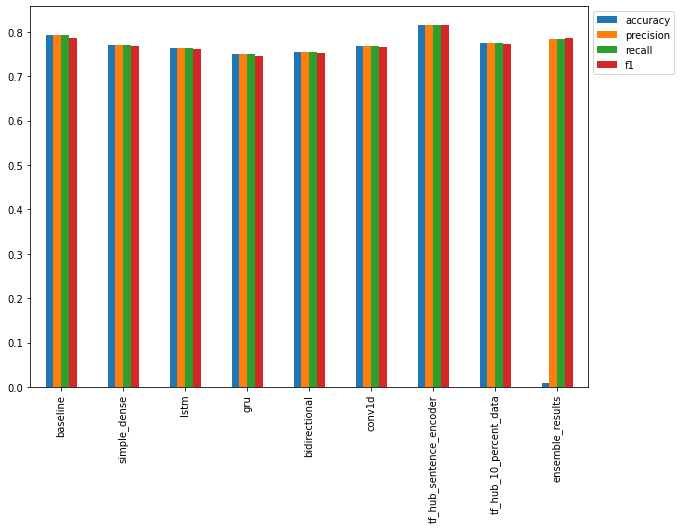

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));


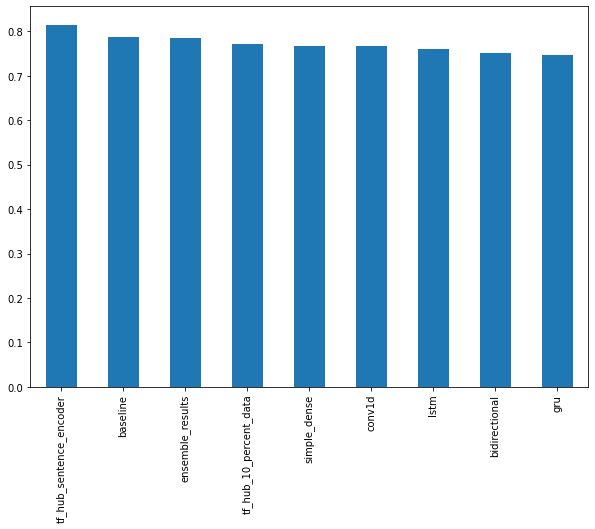

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2022-12-11 13:03:09.512767: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/5QRSQDKwT5SyvzlFLDkGhA/

[2022-12-11T13:03:10] Started scanning logdir.


Interrupted. View your TensorBoard at https://tensorboard.dev/experiment/5QRSQDKwT5SyvzlFLDkGhA/


In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id zZrLiALmQoCWgIeEcBLP3g


Saving and loading a trained model
Although training time didn't take very long, it's good practice to save your trained models to avoid having to retrain them.

Saving your models also enables you to export them for use elsewhere outside of your notebooks, such as in a web application.

There are two main ways of saving a model in TensorFlow:

The HDF5 format.
The SavedModel format (default).
Let's take a look at both.

In [ ]:

# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")


In [ ]:
#  Load model with custom Hub Layer (required with HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:

# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 15ms/step - loss: 0.4262 - accuracy: 0.8163


[0.4261559844017029, 0.8162729740142822]

In [ ]:

# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")


In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:

# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.4262 - accuracy: 0.8163


[0.4261559844017029, 0.8162729740142822]

In [ ]:
#FIND OUR MODELS MOST WRONG PREDICTIONS
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})


# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]


,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.903160
759,FedEx will no longer transport bioterror patho...,0,1.0,0.896139
628,@noah_anyname That's where the concentration c...,0,1.0,0.886456
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.872308
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.845539
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.831009
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.825600
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.812878
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.806311
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.803855


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")


Target: 0, Pred: 1, Prob: 0.9031599164009094
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8961392641067505
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8864561319351196
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8723081350326538
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8455387353897095
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1, Prob: 0.8310092091560364
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, P

In [ ]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.07665817439556122
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.07057886570692062
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0, Prob: 0.06839187443256378
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.06440050154924393
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.06226689741015434
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.05042719841003418
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.049016326665878296
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a

In [ ]:

# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 66ms/step
Pred: 1, Prob: 0.5991340279579163
Text:
@asgharchohan86 @AdilGhumro 
There are floods in kpk because you guys couldn't build dams in 30 years you ruled.
Even for your own Thar

----

1/1 [==============================] - 0s 40ms/step
Pred: 0, Prob: 0.06664081662893295
Text:
Be appalled O heavens at this
    be shocked be utterly desolate
    says the Lord
for my people have committed two evils:

----

1/1 [==============================] - 0s 41ms/step
Pred: 1, Prob: 0.986382782459259
Text:
Satelite Shot: Series of wildfires in Northern California continue blazing: There are at least five fire compl... http://t.co/BmGuHqY7W4

----

1/1 [==============================] - 0s 38ms/step
Pred: 0, Prob: 0.3640305697917938
Text:
PODCAST: Oil spill anniversary http://t.co/wVdAVXTDaq

----

1/1 [==============================] - 0s 43ms/step
Pred: 0, Prob: 0.05839516595005989
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody 

In [ ]:
pred_prob = tf.squeeze(model_6.predict([""])) # has to be list
pred = tf.round(pred_prob)
if(pred):
  print("bad news")
else:
  print("not a bad news")

1/1 [==============================] - 0s 58ms/step
not a bad news
